Importing TF-2 and all relevant dependencies.

In [ ]:
import functools
import os

#!pip install skimage
import skimage
from skimage import metrics
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import cv2

print("TF Version: ", tf.__version__)
print("TF-Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.test.is_gpu_available())


def crop_center(image):
  """Returns a cropped square image."""
  shape = image.shape
  new_shape = min(shape[1], shape[2])
  offset_y = max(shape[1] - shape[2], 0) // 2
  offset_x = max(shape[2] - shape[1], 0) // 2
  image = tf.image.crop_to_bounding_box(
      image, offset_y, offset_x, new_shape, new_shape)
  return image

@functools.lru_cache(maxsize=None)
def load_image(image_url, image_size=(256, 256), preserve_aspect_ratio=True):
  """Loads and preprocesses images."""
  # Cache image file locally.
  image_path = tf.keras.utils.get_file(os.path.basename(image_url)[-128:], image_url)
  # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
  img = plt.imread(image_path).astype(np.float32)[np.newaxis, ...]
  if img.max() > 1.0:
    img = img / 255.
  if len(img.shape) == 3:
    img = tf.stack([img, img, img], axis=-1)
  img = crop_center(img)
  img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
  return img

def show_n(images, titles=('',)):
  n = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize=(w  * n, w))
  gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
  for i in range(n):
    plt.subplot(gs[i])
    plt.imshow(images[i][0], aspect='equal')
    plt.axis('off')
    plt.title(titles[i] if len(titles) > i else '')
  plt.show()



def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title, color):
	# compute the mean squared error and structural similarity
	# index for the images
  
  m = mse(imageA, imageB)
  if color == True:
    s = metrics.structural_similarity(imageA, imageB, multichannel=True)
  else:
    s = metrics.structural_similarity(imageA, imageB, multichannel=False)

  # uncomment below to print the four figures for each input pair as given in our data docuement and report.
  # note: this will print many output images when creating the summations. TO see cleaner data, check attached data file.

  # # setup the figure
  # fig = plt.figure(title)
  # plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
  # # show first image
  # ax = fig.add_subplot(1, 2, 1)
  # plt.imshow(imageA, cmap = plt.cm.gray)
  # plt.axis("off")
  # # show the second image
  # ax = fig.add_subplot(1, 2, 2)
  # plt.imshow(imageB, cmap = plt.cm.gray)
  # plt.axis("off")
  # # show the images
  # plt.show()

  return [m, s]


# Load TF-Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

TF Version:  2.4.1
TF-Hub version:  0.12.0
Eager mode enabled:  True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU available:  False


Image inputs:

In [ ]:
# Declaring categories of content image URLs.


skin_tone_3 = [
                   "https://ak.picdn.net/shutterstock/videos/4633829/thumb/2.jpg", 
                   "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7vXytgmpaM4dtxI_o7O6zBCbydlKKqpUbig&usqp=CAU", 
                   "https://image.shutterstock.com/image-photo/scream-260nw-196637471.jpg", 
                   "https://nypost.com/wp-content/uploads/sites/2/2020/06/white-supremacist-racial-trauma-2.jpg?quality=80&strip=all&w=618&h=410&crop=1",
                   "https://image.shutterstock.com/image-photo/portrait-close-profile-young-woman-260nw-78193243.jpg",
                   "https://media.istockphoto.com/photos/man-portrait-side-view-of-young-blond-guy-in-jean-shirt-looking-on-picture-id1139970314?k=6&m=1139970314&s=612x612&w=0&h=6WlQJEXcL3sd0VenePGcquhLFJI4-wQVnC54R4HMqCw=",
                   "https://media.istockphoto.com/photos/sad-man-in-a-light-blue-tshirt-on-a-white-background-picture-id184918973?k=6&m=184918973&s=170667a&w=0&h=l4LS4xJPdJYRNc1l9PfZ3GOliAtIomNC4CBBMw308cQ=",
                   "https://cdn.vox-cdn.com/thumbor/9GBJDDBTqqdjKBXyZg1JH0Iwm8o=/0x341:4078x2380/fit-in/1200x600/cdn.vox-cdn.com/uploads/chorus_asset/file/13176015/1042005354.jpg.jpg",
                   "https://ak.picdn.net/shutterstock/videos/1583458/thumb/3.jpg ",
                   "https://images.theconversation.com/files/392978/original/file-20210331-17-ggkcys.jpg?ixlib=rb-1.1.0&rect=10%2C0%2C6699%2C4476&q=45&auto=format&w=496&fit=clip"
                  ]

skin_tone_2 = [
                    "https://i.pinimg.com/originals/89/5b/c9/895bc908761b0c3f040f33371a95411f.jpg", 
                    "https://data.whicdn.com/images/330911498/original.jpg",
                    "https://t3.ftcdn.net/jpg/02/29/23/26/360_F_229232603_fj4A81mwpkwBqng2jVqytLtuACZwUkO0.jpg",
                    "https://twt-thumbs.washtimes.com/media/image/2017/02/06/AP_02032402158_c0-88-700-496_s885x516.jpg?603e05c9a8fb5d8e45e28ec6f27473fab1bd2897",
                    "https://image.shutterstock.com/image-photo/beautiful-young-indian-woman-side-260nw-484893796.jpg",
                    "https://media.istockphoto.com/photos/studio-shot-of-young-handsome-muscular-indian-man-against-gray-picture-id697239314?k=6&m=697239314&s=612x612&w=0&h=YHTd-hNmYXI8g1sQD2s_WOyb_kgaB6yrjMBUDOZb3Vg=",
                    "https://elements-video-cover-images-0.imgix.net/files/638af25c-0727-426d-a9b2-e26a9b369226/inline_image_preview.jpg?auto=compress&crop=edges&fit=crop&fm=jpeg&h=800&w=1200&s=97edeffb698ed1964f5e740a3cc099db",
                    "https://pbs.twimg.com/profile_images/1266126707347599361/eswuScbd_400x400.jpg",
                    "https://ak.picdn.net/shutterstock/videos/18613238/thumb/1.jpg?ip=x480 ",
                    "https://variety.com/wp-content/uploads/2019/02/aziz-ansari-sexual-misconduct.jpg?w=1000"
                   ]

skin_tone_1 = [
                  "https://ugc.reveliststatic.com/gen/constrain/640/640/80/2019/05/24/16/cg/xf/phfk2kitws2qbwe.jpg",
                  "https://image.freepik.com/free-photo/attractive-young-black-woman-smiling-against-isolated-white-background_33839-10746.jpg",
                  "https://i.pinimg.com/originals/f7/96/97/f79697f6f8a44f46b68cf3487a97c848.jpg",
                  "https://theminorityeye.com/wp-content/uploads/2020/03/sad-black-woman.jpg",
                  "https://i.pinimg.com/564x/54/3c/85/543c85a8a0c86bb1fb520f21475b76c5.jpg", 
                  "https://media.istockphoto.com/photos/the-happy-business-afroamerican-man-standing-and-smiling-against-blue-picture-id931693612?k=6&m=931693612&s=612x612&w=0&h=61oTEBIl6j2c5036TwjvOOK4JpS-0ybhmEQS79TQ_ik=",
                  "https://st4.depositphotos.com/2000559/21954/v/600/depositphotos_219545910-stock-video-sad-black-man.jpg",
                  "https://coreyevanleak.com/wp-content/uploads/2018/08/angry-black-man.jpg",
                  "https://media.istockphoto.com/photos/portrait-of-cheerful-bearded-black-man-over-yellow-background-picture-id1184187261?k=6&m=1184187261&s=612x612&w=0&h=kAR9bRHxa9XqXCPeTCRZoEPGcgrDMiCqdjWaf7qLNgQ=",
                  "https://i.pinimg.com/originals/59/96/9f/59969f4c8e317f5b980210aace1391ca.jpg" 
                 ]

neutral = [
         "https://i.pinimg.com/originals/59/96/9f/59969f4c8e317f5b980210aace1391ca.jpg",
         "https://ugc.reveliststatic.com/gen/constrain/640/640/80/2019/05/24/16/cg/xf/phfk2kitws2qbwe.jpg",
         "https://variety.com/wp-content/uploads/2019/02/aziz-ansari-sexual-misconduct.jpg?w=1000",
         "https://i.pinimg.com/originals/89/5b/c9/895bc908761b0c3f040f33371a95411f.jpg",
         "https://images.theconversation.com/files/392978/original/file-20210331-17-ggkcys.jpg?ixlib=rb-1.1.0&rect=10%2C0%2C6699%2C4476&q=45&auto=format&w=496&fit=clip",
         "https://ak.picdn.net/shutterstock/videos/4633829/thumb/2.jpg"
        ]

smiling = [
           "https://media.istockphoto.com/photos/portrait-of-cheerful-bearded-black-man-over-yellow-background-picture-id1184187261?k=6&m=1184187261&s=612x612&w=0&h=kAR9bRHxa9XqXCPeTCRZoEPGcgrDMiCqdjWaf7qLNgQ=",
           "https://image.freepik.com/free-photo/attractive-young-black-woman-smiling-against-isolated-white-background_33839-10746.jpg",
           "https://ak.picdn.net/shutterstock/videos/18613238/thumb/1.jpg?ip=x480",
           "https://data.whicdn.com/images/330911498/original.jpg",
           "https://ak.picdn.net/shutterstock/videos/1583458/thumb/3.jpg",
           "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT7vXytgmpaM4dtxI_o7O6zBCbydlKKqpUbig&usqp=CAU"
          ]

angry = [
         "https://coreyevanleak.com/wp-content/uploads/2018/08/angry-black-man.jpg",
         "https://i.pinimg.com/originals/f7/96/97/f79697f6f8a44f46b68cf3487a97c848.jpg",
         "https://pbs.twimg.com/profile_images/1266126707347599361/eswuScbd_400x400.jpg",
         "https://t3.ftcdn.net/jpg/02/29/23/26/360_F_229232603_fj4A81mwpkwBqng2jVqytLtuACZwUkO0.jpg",
         "https://cdn.vox-cdn.com/thumbor/9GBJDDBTqqdjKBXyZg1JH0Iwm8o=/0x341:4078x2380/fit-in/1200x600/cdn.vox-cdn.com/uploads/chorus_asset/file/13176015/1042005354.jpg.jpg",
         "https://image.shutterstock.com/image-photo/scream-260nw-196637471.jpg"
        ]

sad = [
       "https://st4.depositphotos.com/2000559/21954/v/600/depositphotos_219545910-stock-video-sad-black-man.jpg",
       "https://theminorityeye.com/wp-content/uploads/2020/03/sad-black-woman.jpg",
       "https://elements-video-cover-images-0.imgix.net/files/638af25c-0727-426d-a9b2-e26a9b369226/inline_image_preview.jpg?auto=compress&crop=edges&fit=crop&fm=jpeg&h=800&w=1200&s=97edeffb698ed1964f5e740a3cc099db",
       "https://twt-thumbs.washtimes.com/media/image/2017/02/06/AP_02032402158_c0-88-700-496_s885x516.jpg?603e05c9a8fb5d8e45e28ec6f27473fab1bd2897",
       "https://media.istockphoto.com/photos/sad-man-in-a-light-blue-tshirt-on-a-white-background-picture-id184918973?k=6&m=184918973&s=170667a&w=0&h=l4LS4xJPdJYRNc1l9PfZ3GOliAtIomNC4CBBMw308cQ=",
       "https://nypost.com/wp-content/uploads/sites/2/2020/06/white-supremacist-racial-trauma-2.jpg?quality=80&strip=all&w=618&h=410&crop=1",
      ]

profile = [
           "https://media.istockphoto.com/photos/the-happy-business-afroamerican-man-standing-and-smiling-against-blue-picture-id931693612?k=6&m=931693612&s=612x612&w=0&h=61oTEBIl6j2c5036TwjvOOK4JpS-0ybhmEQS79TQ_ik=",
           "https://i.pinimg.com/564x/54/3c/85/543c85a8a0c86bb1fb520f21475b76c5.jpg",
           "https://media.istockphoto.com/photos/studio-shot-of-young-handsome-muscular-indian-man-against-gray-picture-id697239314?k=6&m=697239314&s=612x612&w=0&h=YHTd-hNmYXI8g1sQD2s_WOyb_kgaB6yrjMBUDOZb3Vg=",
           "https://image.shutterstock.com/image-photo/beautiful-young-indian-woman-side-260nw-484893796.jpg",
           "https://media.istockphoto.com/photos/man-portrait-side-view-of-young-blond-guy-in-jean-shirt-looking-on-picture-id1139970314?k=6&m=1139970314&s=612x612&w=0&h=6WlQJEXcL3sd0VenePGcquhLFJI4-wQVnC54R4HMqCw=",
           "https://image.shutterstock.com/image-photo/portrait-close-profile-young-woman-260nw-78193243.jpg"
          ]

everything = skin_tone_3 + skin_tone_2 + skin_tone_1



344064/340102 [==============================] - 0s 0us/step


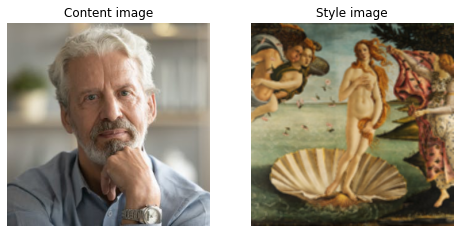

In [ ]:
# @title Image Test  { display-mode: "form" }

content_image_url = "https://images.theconversation.com/files/392978/original/file-20210331-17-ggkcys.jpg?ixlib=rb-1.1.0&rect=10%2C0%2C6699%2C4476&q=45&auto=format&w=496&fit=clip"  # @param {type:"string"}
style_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Sandro_Botticelli_-_La_nascita_di_Venere_-_Google_Art_Project_-_edited.jpg/1200px-Sandro_Botticelli_-_La_nascita_di_Venere_-_Google_Art_Project_-_edited.jpg'  # @param {type:"string"}
output_image_size =   256# @param {type:"integer"}

# The content image size can be arbitrary.
content_img_size = (output_image_size, output_image_size)
# The style prediction model was trained with image size 256 and it's the 
# recommended image size for the style image (though, other sizes work as 
# well but will lead to different results).
style_img_size = (256, 256)  # Recommended to keep it at 256.

content_image = load_image(content_image_url, content_img_size)
style_image = load_image(style_image_url, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
show_n([content_image, style_image], ['Content image', 'Style image'])

Where content_image, style_image, and stylized_image are expected to be 4-D Tensors with shapes [batch_size, image_height, image_width, 3].

In the current example we provide only single images and therefore the batch dimension is 1, but one can use the same module to process more images at the same time.

The input and output values of the images should be in the range [0, 1].

The shapes of content and style image don't have to match. Output image shape is the same as the content image shape.

In [ ]:
def styleDriver(content_url, style_url):
    # Load and stylize content image with given style image.
    # This is pretty fast within a few milliseconds on a GPU.
    content_image_url = content_url
    style_image_url = style_url
    output_image_size = 256

    # The content image size can be arbitrary.
    content_img_size = (output_image_size, output_image_size)
    # The style prediction model was trained with image size 256 and it's the 
    # recommended image size for the style image (though, other sizes work as 
    # well but will lead to different results).
    style_img_size = (256, 256)  # Recommended to keep it at 256.

    content_image = load_image(content_image_url, content_img_size)

    style_image = load_image(style_image_url, style_img_size)
    style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')
    #show_n([content_image, style_image], ['Content image', 'Style image'])
    outputs = hub_module(content_image, style_image)
    stylized_image = outputs[0]

    # THIS NEXT PART IS OUT OF ORDER FROM ACTUAL CODE CELLS
    # Visualize input images and the generated stylized image.
    show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])


    #THIS IS COMPARISON PART
    #structural/content comparison
    content_var = tf.Variable(content_image)
    style_var = tf.Variable(style_image)
    stylized_var = tf.Variable(stylized_image)

    #extract numpy array from image
    content_img = content_var.numpy()[0]
    style_img = style_var .numpy()[0]
    stylized_img = stylized_var.numpy()[0]

    #converts numpy arrays to greyscale
    content_greyscale = cv2.cvtColor(content_img, cv2.COLOR_BGR2GRAY)
    style_greyscale = cv2.cvtColor(style_img, cv2.COLOR_BGR2GRAY)
    stylized_greyscale = cv2.cvtColor(stylized_img, cv2.COLOR_BGR2GRAY)

    msum = 0
    ssum = 0
    #compares content greyscale to output stylized greyscale for content comparison

    msum += compare_images(content_greyscale, stylized_greyscale, "test", False)[0]
    ssum += compare_images(content_greyscale, stylized_greyscale, "test", False)[1]

    #compares color versions of images to get info about how content image changes in terms of color
    #plan: use the residual btwn greyscale comparision and color comparison to get info on how colors changed
    msum += compare_images(content_img, stylized_img, "test", True)[0]
    ssum += compare_images(content_img, stylized_img, "test", True)[1]

    #compares style image with output stylized image to get info on how similar
    #for this to work, need to resize style image to match output stylized image
    msum += compare_images(style_greyscale, stylized_greyscale, "test", False)[0]
    ssum += compare_images(style_greyscale, stylized_greyscale, "test", False)[1]
    msum += compare_images(style_img, stylized_img, "test", True)[0]
    ssum += compare_images(style_img, stylized_img, "test", True)[1]

    
    mavg = msum/4
    savg = ssum/4

    print("mavg = ", mavg, "savg: ", savg)


# TEST:
#styleDriver('https://cdn.psychologytoday.com/sites/default/files/styles/og_image/public/field_blog_entry_teaser_image/2020-02/shutterstock_530466778.jpg?itok=XDZfm12G', 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0b/Sandro_Botticelli_-_La_nascita_di_Venere_-_Google_Art_Project_-_edited.jpg/1200px-Sandro_Botticelli_-_La_nascita_di_Venere_-_Google_Art_Project_-_edited.jpg')


32768/24863 [=======================================] - 0s 0us/step


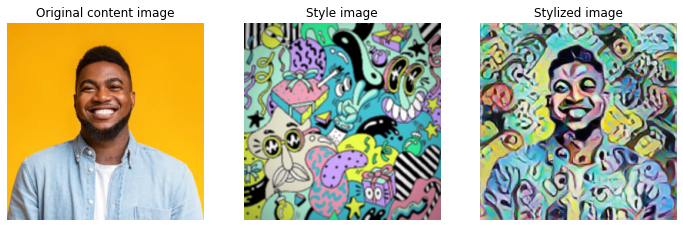

mavg =  0.24599616118342327 savg:  0.1905247865779045
73728/69901 [===============================] - 0s 1us/step


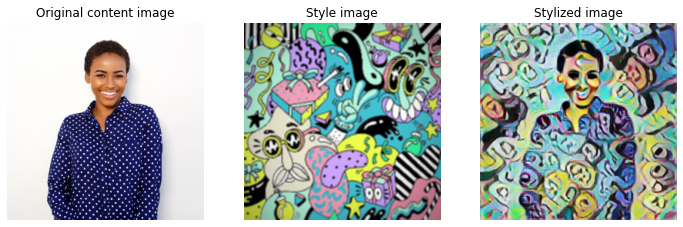

mavg =  0.299636293393919 savg:  0.1597561040212715
16384/11125 [============================================] - 0s 0us/step


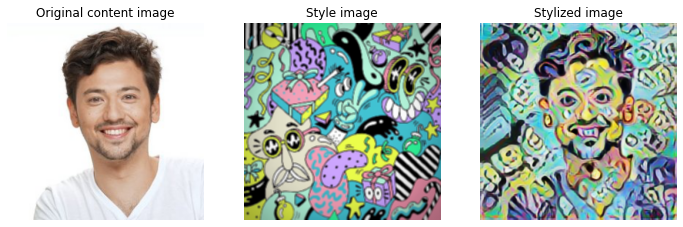

mavg =  0.281493454683317 savg:  0.20014543763962397
57344/52044 [=================================] - 0s 2us/step


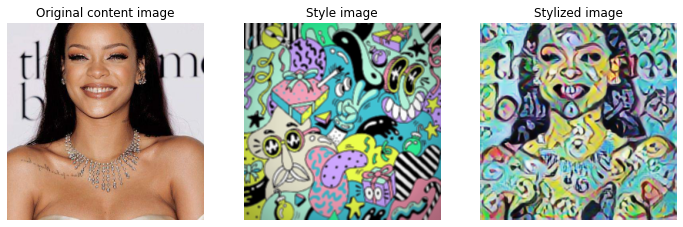

mavg =  0.1978233319378139 savg:  0.2080838372002645
24576/20379 [====================================] - 0s 0us/step


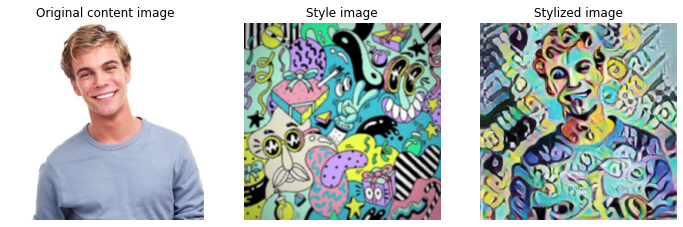

mavg =  0.27406138097226496 savg:  0.19882926962248115
8192/4272 [=========================================================] - 0s 0us/step


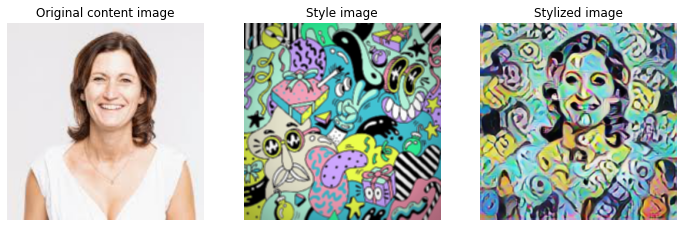

mavg =  0.2544131874270309 savg:  0.20000105601750823


In [ ]:
for face in smiling:
  styleDriver(face, 'https://i.pinimg.com/originals/e9/6d/6f/e96d6fb52a0b336a0c849da80a389a4e.jpg')